In [3]:
pip install numpy matplotlib


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


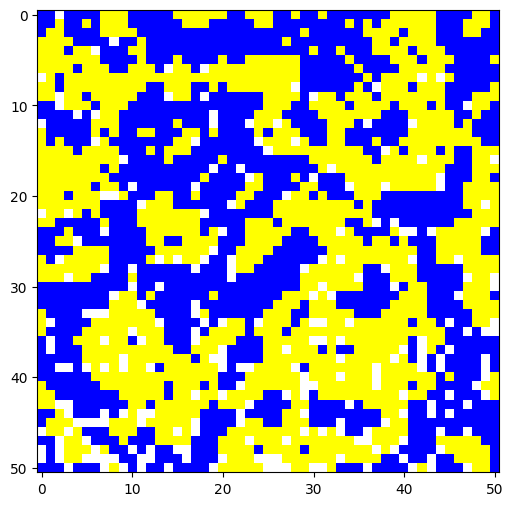

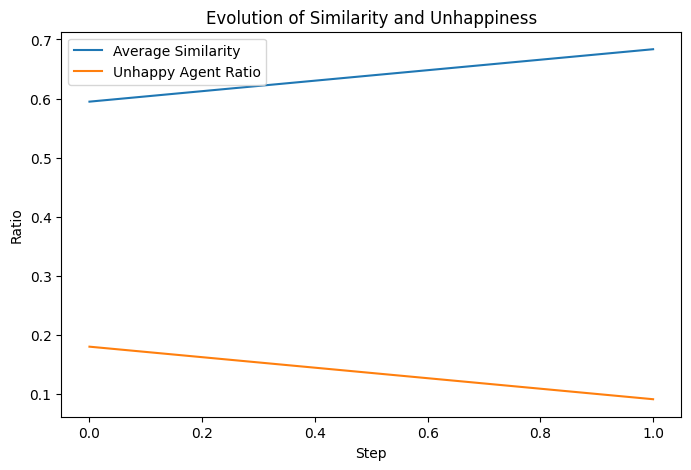

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# パラメータ設定
width = height = 51  # パッチのサイズ
density = 0.9  # エージェントの密度
similarity_threshold = 0.5  # ハッピーになるための隣接するエージェントの割合
max_steps = 10000  # 最大ステップ数

# グリッドの作成
grid = np.random.choice([0, 1, 2], size=(width, height), p=[1 - density, density / 2, density / 2])
# 0: 空白, 1: 黄色, 2: 青

# データ記録用リスト
similarity_list = []
unhappy_ratio_list = []

# エージェントがハッピーかどうかを判定
def is_happy(i, j):
    similar_neighbors = 0
    total_neighbors = 0
    for di in [-1, 0, 1]:
        for dj in [-1, 0, 1]:
            if di == 0 and dj == 0: continue
            ni, nj = (i + di) % width, (j + dj) % height
            if grid[ni, nj] != 0:
                total_neighbors += 1
                if grid[ni, nj] == grid[i, j]:
                    similar_neighbors += 1
    if total_neighbors == 0:
        return True  # 他にエージェントがいない場合はハッピー
    return similar_neighbors / total_neighbors >= similarity_threshold

# エージェントを移動させる
def move_agent(i, j):
    empty_cells = list(zip(*np.where(grid == 0)))  # グリッド全体から空白セルを探す
    if empty_cells:
        ni, nj = empty_cells[np.random.choice(len(empty_cells))]  # ランダムに移動先を選ぶ
        grid[ni, nj] = grid[i, j]  # 移動
        grid[i, j] = 0  # 元の位置を空白にする

# エージェントの更新
def update_agents():
    for i in range(width):
        for j in range(height):
            if grid[i, j] != 0:  # エージェントがいる場合
                if not is_happy(i, j):
                    move_agent(i, j)  # 不満な場合は移動させる

# 平均similarityと不満足なエージェントの割合を計算
def compute_statistics():
    total_similarity = 0
    total_agents = 0
    unhappy_count = 0
    for i in range(width):
        for j in range(height):
            if grid[i, j] != 0:
                total_agents += 1
                if not is_happy(i, j):
                    unhappy_count += 1
                similar_neighbors = sum(
                    1 for di in [-1, 0, 1] for dj in [-1, 0, 1]
                    if not (di == 0 and dj == 0)
                    and grid[(i + di) % width, (j + dj) % height] == grid[i, j]
                )
                total_similarity += similar_neighbors / 8  # 近傍の8セルで割る
    
    avg_similarity = total_similarity / total_agents if total_agents > 0 else 0
    unhappy_ratio = unhappy_count / total_agents if total_agents > 0 else 0
    similarity_list.append(avg_similarity)
    unhappy_ratio_list.append(unhappy_ratio)

# アニメーションの更新関数
def update_frame(frame):
    update_agents()
    compute_statistics()
    im.set_array(grid)  # 数値データを渡す
    if frame >= max_steps:  # 最大ステップに達したら停止
        ani.event_source.stop()
    return [im]

# 初期化
fig, ax = plt.subplots(figsize=(6, 6))
cmap = plt.cm.colors.ListedColormap(['white', 'yellow', 'blue'])
im = ax.imshow(grid, cmap=cmap, interpolation='nearest')

# アニメーション
ani = FuncAnimation(fig, update_frame, frames=max_steps, interval=200, blit=True, cache_frame_data=False)
plt.show()

# 結果のプロット
plt.figure(figsize=(8, 5))
plt.plot(similarity_list, label='Average Similarity')
plt.plot(unhappy_ratio_list, label='Unhappy Agent Ratio')
plt.xlabel('Step')
plt.ylabel('Ratio')
plt.legend()
plt.title('Evolution of Similarity and Unhappiness')
plt.show()


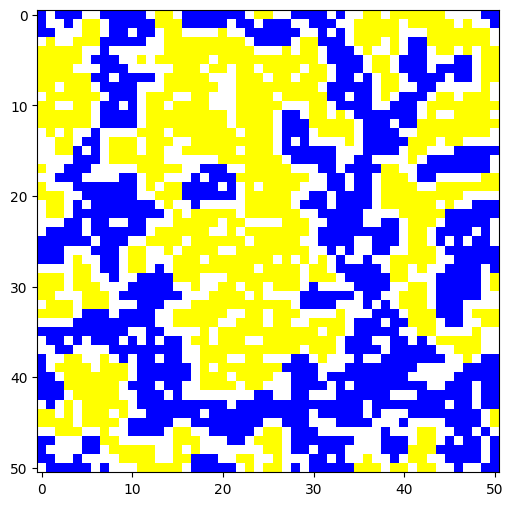

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# パラメータ設定
width = height = 51  # パッチのサイズ
density = 0.7  # エージェントの密度
similarity_threshold = 0.6  # ハッピーになるための隣接するエージェントの割合
max_steps = 10000  # 最大ステップ数

# グリッドの作成
grid = np.random.choice([0, 1, 2], size=(width, height), p=[1 - density, density / 2, density / 2])
# 0: 空白, 1: 黄色, 2: 青

# データ記録用リスト
similarity_list = []
unhappy_ratio_list = []

# エージェントがハッピーかどうかを判定
def is_happy(i, j):
    similar_neighbors = 0
    total_neighbors = 0
    for di in [-1, 0, 1]:
        for dj in [-1, 0, 1]:
            if di == 0 and dj == 0: continue
            ni, nj = (i + di) % width, (j + dj) % height
            if grid[ni, nj] != 0:
                total_neighbors += 1
                if grid[ni, nj] == grid[i, j]:
                    similar_neighbors += 1
    if total_neighbors == 0:
        return True  # 他にエージェントがいない場合はハッピー
    return similar_neighbors / total_neighbors >= similarity_threshold

# エージェントを移動させる
def move_agent(i, j):
    empty_cells = list(zip(*np.where(grid == 0)))  # グリッド全体から空白セルを探す
    if empty_cells:
        ni, nj = empty_cells[np.random.choice(len(empty_cells))]  # ランダムに移動先を選ぶ
        grid[ni, nj] = grid[i, j]  # 移動
        grid[i, j] = 0  # 元の位置を空白にする

# エージェントの更新
def update_agents():
    for i in range(width):
        for j in range(height):
            if grid[i, j] != 0:  # エージェントがいる場合
                if not is_happy(i, j):
                    move_agent(i, j)  # 不満な場合は移動させる

# 平均similarityと不満足なエージェントの割合を計算
def compute_statistics():
    total_similarity = 0
    total_agents = 0
    unhappy_count = 0
    for i in range(width):
        for j in range(height):
            if grid[i, j] != 0:
                total_agents += 1
                if not is_happy(i, j):
                    unhappy_count += 1
                similar_neighbors = sum(
                    1 for di in [-1, 0, 1] for dj in [-1, 0, 1]
                    if not (di == 0 and dj == 0)
                    and grid[(i + di) % width, (j + dj) % height] == grid[i, j]
                )
                total_similarity += similar_neighbors / 8  # 近傍の8セルで割る
    
    avg_similarity = total_similarity / total_agents if total_agents > 0 else 0
    unhappy_ratio = unhappy_count / total_agents if total_agents > 0 else 0
    similarity_list.append(avg_similarity)
    unhappy_ratio_list.append(unhappy_ratio)

# アニメーションの更新関数
def update_frame(frame):
    update_agents()
    compute_statistics()
    im.set_array(grid)  # 数値データを渡す
    if frame >= max_steps:  # 最大ステップに達したら停止
        ani.event_source.stop()
    return [im]

# 初期化
fig, ax = plt.subplots(figsize=(6, 6))
cmap = plt.cm.colors.ListedColormap(['white', 'yellow', 'blue'])
im = ax.imshow(grid, cmap=cmap, interpolation='nearest')





ani = FuncAnimation(fig, update_frame, frames=100, interval=200)
HTML(ani.to_jshtml())  # あるいは to_html5_video()



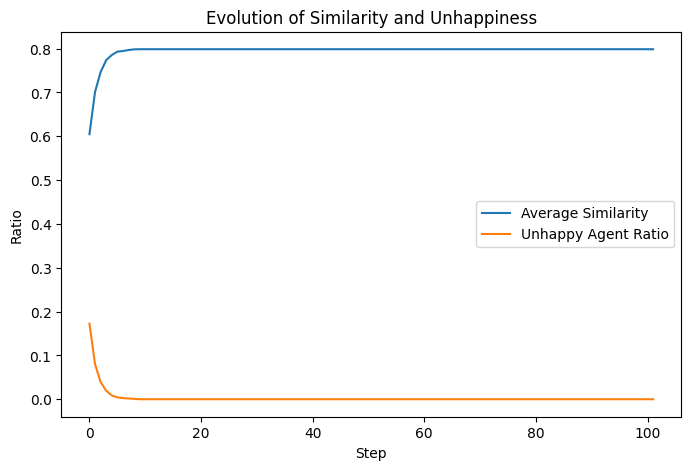

In [7]:

# 結果のプロット
plt.figure(figsize=(8, 5))
plt.plot(similarity_list, label='Average Similarity')
plt.plot(unhappy_ratio_list, label='Unhappy Agent Ratio')
plt.xlabel('Step')
plt.ylabel('Ratio')
plt.legend()
plt.title('Evolution of Similarity and Unhappiness')
plt.show()
